## Basic CNN

In [2]:
# Importing packages needed
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import torch

# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalising pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Encoding the labels to categorical variables
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Splitting the training data into training and validation sets
val_size = int(len(train_images)*0.2)  # You can adjust the size of the validation set as needed
val_images = train_images[:val_size]
val_labels = train_labels[:val_size]
train_images = train_images[val_size:]
train_labels = train_labels[val_size:]

# Defining the CNN model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting a manual seed
torch.manual_seed(1748578)

# Training the model
epochs = 10
history = cnn_model.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(val_images, val_labels))

# Storing training metrics
cnn_training_loss = history.history['loss']
cnn_validation_loss = history.history['val_loss']
cnn_training_accuracy = history.history['accuracy']
cnn_validation_accuracy = history.history['val_accuracy']

# Saving the model
cnn_model.save('cifar10_cnn_model.keras')

# Evaluating the model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {cnn_test_acc}')

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1250/1250 [==============================] - 16s 4ms/step - loss: 1.6394 - accuracy: 0.4002 - val_loss: 1.3784 - val_accuracy: 0.5025
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2714 - accuracy: 0.5467 - val_loss: 1.1627 - val_accuracy: 0.5849
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1153 - accuracy: 0.6067 - val_loss: 1.0704 - val_accuracy: 0.6219
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0156 - accuracy: 0.6431 - val_loss: 1.0280 - val_accuracy: 0.6342
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9342 - accuracy: 0.6722 - val_loss: 0.9597 - val_accuracy: 0.6614
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8730 - accuracy: 0.6921 - val_loss: 0.9445 - val_accuracy: 0.6723
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step 

## LeNet CNN

In [4]:
# Defining the LeNet model
lenet_model = models.Sequential()

# Layer 1: Convolutional Layer
lenet_model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
lenet_model.add(layers.MaxPooling2D((2, 2)))
# Layer 2: Convolutional Layer
lenet_model.add(layers.Conv2D(16, (5, 5), activation='relu'))
lenet_model.add(layers.MaxPooling2D((2, 2)))
# Flattening layer
lenet_model.add(layers.Flatten())
# Layer 3: Fully Connected Layer
lenet_model.add(layers.Dense(120, activation='relu'))
# Layer 4: Fully Connected Layer
lenet_model.add(layers.Dense(84, activation='relu'))
# Output Layer
lenet_model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
lenet_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting a manual seed
torch.manual_seed(1748578)

# Training the model
epochs = 10
history = lenet_model.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(val_images, val_labels))

# Storing training metrics
lenet_training_loss = history.history['loss']
lenet_validation_loss = history.history['val_loss']
lenet_training_accuracy = history.history['accuracy']
lenet_validation_accuracy = history.history['val_accuracy']

# Saving the model
lenet_model.save('cifar10_lenet_model.keras')

# Evaluating the model on the test set
lenet_test_loss, lenet_test_acc = lenet_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {lenet_test_acc}')

Epoch 1/10
1250/1250 [==============================] - 7s 4ms/step - loss: 1.6887 - accuracy: 0.3771 - val_loss: 1.4620 - val_accuracy: 0.4588
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3742 - accuracy: 0.5016 - val_loss: 1.2662 - val_accuracy: 0.5433
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2473 - accuracy: 0.5526 - val_loss: 1.2168 - val_accuracy: 0.5681
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1630 - accuracy: 0.5873 - val_loss: 1.2027 - val_accuracy: 0.5784
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0956 - accuracy: 0.6107 - val_loss: 1.1821 - val_accuracy: 0.5819
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0451 - accuracy: 0.6309 - val_loss: 1.1545 - val_accuracy: 0.5949
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9919 - accuracy: 0.6484 - val_loss: 1.1073 - val_accuracy:

## AlexNet CNN

In [6]:
# Defining the AlexNet model
alexnet_model = models.Sequential()

# Layer 1: Convolutional Layer
alexnet_model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
alexnet_model.add(layers.MaxPooling2D((2, 2)))
# Layer 2: Convolutional Layer
alexnet_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
alexnet_model.add(layers.MaxPooling2D((2, 2)))
# Layer 3: Convolutional Layer
alexnet_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# Layer 4: Convolutional Layer
alexnet_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# Layer 5: Convolutional Layer
alexnet_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
alexnet_model.add(layers.MaxPooling2D((2, 2)))
# Flattening layer
alexnet_model.add(layers.Flatten())
# Layer 6: Fully Connected Layer
alexnet_model.add(layers.Dense(512, activation='relu'))
# Layer 7: Fully Connected Layer
alexnet_model.add(layers.Dense(256, activation='relu'))
# Output Layer
alexnet_model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
alexnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Setting a manual seed
torch.manual_seed(1748578)

# Training the model
epochs = 10
history = alexnet_model.fit(train_images, train_labels, epochs=epochs,
                            validation_data=(val_images, val_labels))

# Storing training metrics
alexnet_training_loss = history.history['loss']
alexnet_validation_loss = history.history['val_loss']
alexnet_training_accuracy = history.history['accuracy']
alexnet_validation_accuracy = history.history['val_accuracy']

# Saving the model
alexnet_model.save('cifar10_alexnet_model.keras')

# Evaluating the model on the test set
alexnet_test_loss, alexnet_test_acc = alexnet_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {alexnet_test_acc}')


Epoch 1/10
1250/1250 [==============================] - 12s 7ms/step - loss: 1.7369 - accuracy: 0.3419 - val_loss: 1.3915 - val_accuracy: 0.4879
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2703 - accuracy: 0.5398 - val_loss: 1.1165 - val_accuracy: 0.6023
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0475 - accuracy: 0.6272 - val_loss: 0.9730 - val_accuracy: 0.6583
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8909 - accuracy: 0.6855 - val_loss: 0.9033 - val_accuracy: 0.6852
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7700 - accuracy: 0.7290 - val_loss: 0.8823 - val_accuracy: 0.6898
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6764 - accuracy: 0.7600 - val_loss: 0.8542 - val_accuracy: 0.7061
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5921 - accuracy: 0.7922 - val_loss: 0.8661 - val_accuracy

## ResNet CNN

In [10]:
# Importing packages needed
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Add

# Input layer
input_layer = keras.Input(shape=(32, 32, 3))
# Initial Convolution Layer
x = layers.Conv2D(64, (7, 7), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((3, 3))(x)

# Residual Block 1
block1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
block1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(block1)
# Adding a 1x1 convolution to match dimensions
shortcut1 = layers.Conv2D(64, (1, 1), strides=(1, 1), padding='same')(x)
x = Add()([shortcut1, block1])
x = layers.Activation('relu')(x)

# Residual Block 2
block2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
block2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(block2)
# Adding a 1x1 convolution to match dimensions
shortcut2 = layers.Conv2D(128, (1, 1), strides=(1, 1), padding='same')(x)
x = Add()([shortcut2, block2])
x = layers.Activation('relu')(x)

# Flattening layer
x = layers.Flatten()(x)
# Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)
# Output Layer
output_layer = layers.Dense(10, activation='softmax')(x)

# Creating the model
simple_resnet = keras.Model(inputs=input_layer, outputs=output_layer)

# Compiling the model
simple_resnet.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Setting a manual seed
torch.manual_seed(1748578)

# Training the model
epochs = 10
history = simple_resnet.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels))

# Storing training metrics
resnet_training_loss = history.history['loss']
resnet_validation_loss = history.history['val_loss']
resnet_training_accuracy = history.history['accuracy']
resnet_validation_accuracy = history.history['val_accuracy']

# Saving the model
simple_resnet.save('cifar10_simple_resnet.keras')

# Evaluating the model on the test set
resnet_test_loss, resnet_test_acc = simple_resnet.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {resnet_test_acc}')


Epoch 1/10
1250/1250 [==============================] - 10s 6ms/step - loss: 1.5446 - accuracy: 0.4415 - val_loss: 1.3545 - val_accuracy: 0.5169
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1788 - accuracy: 0.5835 - val_loss: 1.0920 - val_accuracy: 0.6136
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9713 - accuracy: 0.6565 - val_loss: 1.0455 - val_accuracy: 0.6352
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7695 - accuracy: 0.7274 - val_loss: 1.0106 - val_accuracy: 0.6536
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5689 - accuracy: 0.7993 - val_loss: 1.0591 - val_accuracy: 0.6649
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3627 - accuracy: 0.8729 - val_loss: 1.2379 - val_accuracy: 0.6461
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2330 - accuracy: 0.9188 - val_loss: 1.4591 - val_accuracy

## Comparing Four Models

In [12]:
# Changing accuracies to percentage values
cnn_test_acc_percent = round(cnn_test_acc*100, 3)
lenet_test_acc_percent = round(lenet_test_acc*100, 3)
alexnet_test_acc_percent = round(alexnet_test_acc*100, 3)
resnet_test_acc_percent = round(resnet_test_acc*100, 3)

cnn_validation_accuracy_percent = round(cnn_validation_accuracy[-1]*100, 3)
lenet_validation_accuracy_percent = round(lenet_validation_accuracy[-1]*100, 3)
alexnet_validation_accuracy_percent = round(alexnet_validation_accuracy[-1]*100, 3)
resnet_validation_accuracy_percent = round(resnet_validation_accuracy[-1]*100, 3)

In [13]:
# Importing packages needed
import pandas as pd

# Creating a Pandas DataFrame with the test accuracy values and column labels
data = {'CNN Model': ['Basic', 'LeNet', 'AlexNet', 'ResNet'],
        'Validation Accuracy (%)': [cnn_validation_accuracy_percent, lenet_validation_accuracy_percent, alexnet_validation_accuracy_percent, resnet_validation_accuracy_percent],
        'Test Accuracy (%)': [cnn_test_acc_percent, lenet_test_acc_percent, alexnet_test_acc_percent, resnet_test_acc_percent]}

accuracy_table = pd.DataFrame(data)
accuracy_table = accuracy_table.sort_values(by='Test Accuracy (%)', ascending=False)

# Showing the table
accuracy_table

,CNN Model,Validation Accuracy (%),Test Accuracy (%)
2,AlexNet,71.97,71.22
0,Basic,68.44,68.13
3,ResNet,64.33,63.25
1,LeNet,60.01,58.93


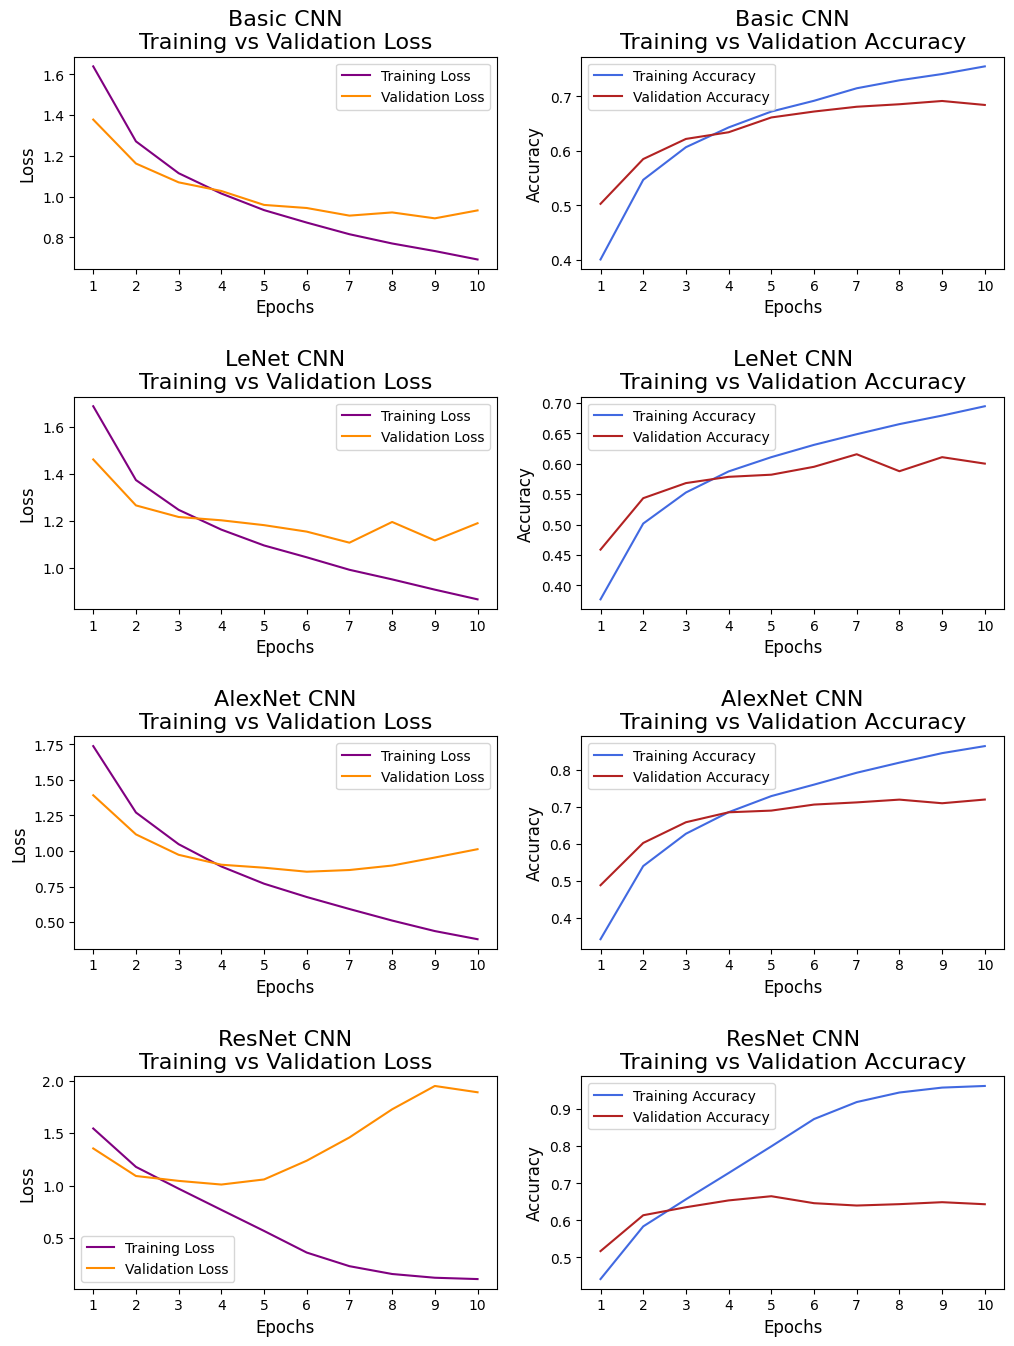

In [51]:
# Importing packages needed
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots for each model in a 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.6)
axes = axes.flatten()
epochs = 10

# Plotting loss against epochs on the first subplot
axes[0].plot(cnn_training_loss, color="purple", label='Training Loss')
axes[0].plot(cnn_validation_loss, color="darkorange", label='Validation Loss')
axes[0].set_title('Basic CNN\nTraining vs Validation Loss', fontsize=16)
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].set_xticks(np.arange(epochs))
axes[0].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the second subplot
axes[1].plot(cnn_training_accuracy, color="royalblue", label='Training Accuracy')
axes[1].plot(cnn_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[1].set_title('Basic CNN\nTraining vs Validation Accuracy', fontsize=16)
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].set_xticks(np.arange(epochs))
axes[1].set_xticklabels(np.arange(1, epochs+1))

# Plotting loss against epochs on the third subplot
axes[2].plot(lenet_training_loss, color="purple", label='Training Loss')
axes[2].plot(lenet_validation_loss, color="darkorange", label='Validation Loss')
axes[2].set_title('LeNet CNN\nTraining vs Validation Loss', fontsize=16)
axes[2].set_xlabel('Epochs', fontsize=12)
axes[2].set_ylabel('Loss', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].set_xticks(np.arange(epochs))
axes[2].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the fourth subplot
axes[3].plot(lenet_training_accuracy, color="royalblue", label='Training Accuracy')
axes[3].plot(lenet_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[3].set_title('LeNet CNN\nTraining vs Validation Accuracy', fontsize=16)
axes[3].set_xlabel('Epochs', fontsize=12)
axes[3].set_ylabel('Accuracy', fontsize=12)
axes[3].legend(fontsize=10)
axes[3].set_xticks(np.arange(epochs))
axes[3].set_xticklabels(np.arange(1, epochs+1))

# Plotting loss against epochs on the fifth subplot
axes[4].plot(alexnet_training_loss, color="purple", label='Training Loss')
axes[4].plot(alexnet_validation_loss, color="darkorange", label='Validation Loss')
axes[4].set_title('AlexNet CNN\nTraining vs Validation Loss', fontsize=16)
axes[4].set_xlabel('Epochs', fontsize=12)
axes[4].set_ylabel('Loss', fontsize=12)
axes[4].legend(fontsize=10)
axes[4].set_xticks(np.arange(epochs))
axes[4].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the sixth subplot
axes[5].plot(alexnet_training_accuracy, color="royalblue", label='Training Accuracy')
axes[5].plot(alexnet_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[5].set_title('AlexNet CNN\nTraining vs Validation Accuracy', fontsize=16)
axes[5].set_xlabel('Epochs', fontsize=12)
axes[5].set_ylabel('Accuracy', fontsize=12)
axes[5].legend(fontsize=10)
axes[5].set_xticks(np.arange(epochs))
axes[5].set_xticklabels(np.arange(1, epochs+1))

# Plotting loss against epochs on the seventh subplot
axes[6].plot(resnet_training_loss, color="purple", label='Training Loss')
axes[6].plot(resnet_validation_loss, color="darkorange", label='Validation Loss')
axes[6].set_title('ResNet CNN\nTraining vs Validation Loss', fontsize=16)
axes[6].set_xlabel('Epochs', fontsize=12)
axes[6].set_ylabel('Loss', fontsize=12)
axes[6].legend(fontsize=10)
axes[6].set_xticks(np.arange(epochs))
axes[6].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the eighth subplot
axes[7].plot(resnet_training_accuracy, color="royalblue", label='Training Accuracy')
axes[7].plot(resnet_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[7].set_title('ResNet CNN\nTraining vs Validation Accuracy', fontsize=16)
axes[7].set_xlabel('Epochs', fontsize=12)
axes[7].set_ylabel('Accuracy', fontsize=12)
axes[7].legend(fontsize=10)
axes[7].set_xticks(np.arange(epochs))
axes[7].set_xticklabels(np.arange(1, epochs+1))

# Plotting the plots
plt.show()

## AlexNet 2.0

Added dropout layers, early stopping, model checkpoints, learning rate scheduler. Increased epochs to 20.

In [22]:
# Importing packages needed
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Defining the AlexNet 2.0 model
alexnet_model_2 = keras.Sequential()

# Layer 1: Convolutional Layer
alexnet_model_2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
alexnet_model_2.add(layers.MaxPooling2D((2, 2)))
alexnet_model_2.add(layers.Dropout(0.3))
# Layer 2: Convolutional Layer
alexnet_model_2.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
alexnet_model_2.add(layers.MaxPooling2D((2, 2)))
alexnet_model_2.add(layers.Dropout(0.3))
# Layer 3: Convolutional Layer
alexnet_model_2.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# Layer 4: Convolutional Layer
alexnet_model_2.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
# Layer 5: Convolutional Layer
alexnet_model_2.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
alexnet_model_2.add(layers.MaxPooling2D((2, 2)))
alexnet_model_2.add(layers.Dropout(0.3))
# Flattening layer
alexnet_model_2.add(layers.Flatten())
# Layer 6: Fully Connected Layer
alexnet_model_2.add(layers.Dense(512, activation='relu'))
alexnet_model_2.add(layers.Dropout(0.5))
# Layer 7: Fully Connected Layer
alexnet_model_2.add(layers.Dense(256, activation='relu'))
alexnet_model_2.add(layers.Dropout(0.5))
# Output Layer
alexnet_model_2.add(layers.Dense(10, activation='softmax'))

# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Define your learning rate
alexnet_model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cifar10_alexnet_model_2.h5', save_best_only=True)

# Defining a learning rate schedule using a learning rate scheduler function
def learning_rate_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Setting a manual seed (optional)
torch.manual_seed(1748578)

# Training the model with callbacks
epochs = 20
history = alexnet_model_2.fit(
    train_images, train_labels,
    epochs=epochs,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]  # Add callbacks
)

# Storing training metrics
alexnet_model_2_training_loss = history.history['loss']
alexnet_model_2_validation_loss = history.history['val_loss']
alexnet_model_2_training_accuracy = history.history['accuracy']
alexnet_model_2_validation_accuracy = history.history['val_accuracy']

# Loading the best model weights (if early stopping is used)
alexnet_model_2.load_weights('cifar10_alexnet_model_2.h5')

# Evaluating the model on the test set
alexnet_model_2_test_loss, alexnet_model_2_test_acc = alexnet_model_2.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {alexnet_model_2_test_acc}')


Epoch 1/20
1250/1250 [==============================] - 12s 8ms/step - loss: 1.8410 - accuracy: 0.3057 - val_loss: 1.5325 - val_accuracy: 0.4207 - lr: 0.0010
Epoch 2/20
   1/1250 [..............................] - ETA: 11s - loss: 1.7872 - accuracy: 0.2812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 10s 8ms/step - loss: 1.4855 - accuracy: 0.4572 - val_loss: 1.2721 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3441 - accuracy: 0.5199 - val_loss: 1.1528 - val_accuracy: 0.5765 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2462 - accuracy: 0.5589 - val_loss: 1.1746 - val_accuracy: 0.5762 - lr: 0.0010
Epoch 5/20
1250/1250 [==============================] - 9s 8ms/step - loss: 1.1708 - accuracy: 0.5908 - val_loss: 1.0539 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0057 - accuracy: 0.6466 - val_loss: 0.9215 - val_accuracy: 0.6677 - lr: 1.0000e-04
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9649 - accuracy: 0.6608 - val_loss: 0.9027 - val_accuracy: 0.6752 - lr: 1.0000e-04
Epoch 8/20
1250/1250 [==============================] - 1

## AlexNet 3.0

Removed learning rate scheduler, decreased learning rate. Add regularization, another fully connected layer.

In [24]:
# Importing packages needed
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Defining the AlexNet 3.0 model
alexnet_model_3 = keras.Sequential()

# Layer 1: Convolutional Layer
alexnet_model_3.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
alexnet_model_3.add(layers.MaxPooling2D((2, 2)))
alexnet_model_3.add(layers.Dropout(0.3))
# Layer 2: Convolutional Layer
alexnet_model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
alexnet_model_3.add(layers.MaxPooling2D((2, 2)))
alexnet_model_3.add(layers.Dropout(0.3))
# Layer 3: Convolutional Layer
alexnet_model_3.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
# Layer 4: Convolutional Layer
alexnet_model_3.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
# Layer 5: Convolutional Layer
alexnet_model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
alexnet_model_3.add(layers.MaxPooling2D((2, 2)))
alexnet_model_3.add(layers.Dropout(0.3))
# Flatten the feature maps
alexnet_model_3.add(layers.Flatten())
# Layer 6: Fully Connected Layer
alexnet_model_3.add(layers.Dense(512, activation='relu'))
alexnet_model_3.add(layers.Dropout(0.5))
# Layer 7: Fully Connected Layer
alexnet_model_3.add(layers.Dense(256, activation='relu'))
alexnet_model_3.add(layers.Dropout(0.5))
# Layer 8: Fully Connected Layer
alexnet_model_3.add(layers.Dense(128, activation='relu'))
alexnet_model_3.add(layers.Dropout(0.5))
# Output Layer
alexnet_model_3.add(layers.Dense(10, activation='softmax'))

# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Define your learning rate
alexnet_model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cifar10_alexnet_model_3.h5', save_best_only=True)

# Setting a manual seed (optional)
torch.manual_seed(1748578)

# Training the model with callbacks
epochs = 20
history = alexnet_model_3.fit(
    train_images, train_labels,
    epochs=epochs,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, model_checkpoint])

# Storing training metrics
alexnet_model_3_training_loss = history.history['loss']
alexnet_model_3_validation_loss = history.history['val_loss']
alexnet_model_3_training_accuracy = history.history['accuracy']
alexnet_model_3_validation_accuracy = history.history['val_accuracy']

# Loading the best model weights (if early stopping is used)
alexnet_model_3.load_weights('cifar10_alexnet_model_3.h5')

# Evaluating the model on the test set
alexnet_model_3_test_loss, alexnet_model_3_test_acc = alexnet_model_3.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {alexnet_model_3_test_acc}')


Epoch 1/20
1250/1250 [==============================] - 13s 8ms/step - loss: 2.2398 - accuracy: 0.1801 - val_loss: 1.8653 - val_accuracy: 0.3331
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7804 - accuracy: 0.3479 - val_loss: 1.5483 - val_accuracy: 0.4447
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5040 - accuracy: 0.4709 - val_loss: 1.4039 - val_accuracy: 0.5063
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3346 - accuracy: 0.5434 - val_loss: 1.1523 - val_accuracy: 0.6080
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1944 - accuracy: 0.6014 - val_loss: 1.0468 - val_accuracy: 0.6426
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0899 - accuracy: 0.6414 - val_loss: 0.9889 - val_accuracy: 0.6670
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0082 - accuracy: 0.6758 - val_loss: 0.9564 - val_ac

## CNN Model 2.0

Added dropout layers, early stopping, model checkpoints, learning rate scheduler. Increased epochs to 20.

In [26]:
# Importing packages needed
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import torch

# Defining the CNN 2.0 model
cnn_model_2 = models.Sequential()
cnn_model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model_2.add(layers.MaxPooling2D((2, 2)))
cnn_model_2.add(layers.Dropout(0.3))
cnn_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(layers.MaxPooling2D((2, 2)))
cnn_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(layers.Flatten())
cnn_model_2.add(layers.Dense(64, activation='relu'))
cnn_model_2.add(layers.Dropout(0.5))
cnn_model_2.add(layers.Dense(10, activation='softmax'))

# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Define your learning rate
cnn_model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cifar10_cnn_model_2.h5', save_best_only=True)

# Defining a learning rate schedule using a learning rate scheduler function
def learning_rate_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Setting a manual seed
torch.manual_seed(1748578)

# Training the model
epochs = 20
history = cnn_model_2.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping, model_checkpoint, lr_scheduler])

# Storing training metrics
cnn_model_2_training_loss = history.history['loss']
cnn_model_2_validation_loss = history.history['val_loss']
cnn_model_2_training_accuracy = history.history['accuracy']
cnn_model_2_validation_accuracy = history.history['val_accuracy']

# Saving the model
cnn_model_2.save('cifar10_cnn_model_2.keras')

# Evaluating the model on the test set
cnn_model_2_test_loss, cnn_model_2_test_acc = cnn_model_2.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {cnn_model_2_test_acc}')

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 1.7950 - accuracy: 0.3318 - val_loss: 1.4270 - val_accuracy: 0.4915 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4758 - accuracy: 0.4670 - val_loss: 1.2897 - val_accuracy: 0.5493 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3364 - accuracy: 0.5202 - val_loss: 1.1578 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2519 - accuracy: 0.5549 - val_loss: 1.1213 - val_accuracy: 0.6109 - lr: 0.0010
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1845 - accuracy: 0.5825 - val_loss: 1.0382 - val_accuracy: 0.6362 - lr: 0.0010
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0559 - accuracy: 0.6295 - val_loss: 0.9716 - val_accuracy: 0.6593 - lr: 1.0000e-04
Epoch 7/20
1250/1250 [==============================] 

## CNN Model 3.0

Removed learning rate scheduler. Add regularization.

In [28]:
# Importing packages needed
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import torch

# Defining the CNN 3.0 model
cnn_model_3 = models.Sequential()
cnn_model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.0001)))
cnn_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_model_3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
cnn_model_3.add(layers.MaxPooling2D((2, 2)))
cnn_model_3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
cnn_model_3.add(layers.Flatten())
cnn_model_3.add(layers.Dense(64, activation='relu'))
cnn_model_3.add(layers.Dropout(0.5))
cnn_model_3.add(layers.Dense(10, activation='softmax'))

# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Define your learning rate
cnn_model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cifar10_cnn_model_3.h5', save_best_only=True)

# Setting a manual seed
torch.manual_seed(1748578)

# Training the model
epochs = 20
history = cnn_model_3.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping, model_checkpoint])

# Storing training metrics
cnn_model_3_training_loss = history.history['loss']
cnn_model_3_validation_loss = history.history['val_loss']
cnn_model_3_training_accuracy = history.history['accuracy']
cnn_model_3_validation_accuracy = history.history['val_accuracy']

# Loading the best model weights (if early stopping is used)
cnn_model_3.load_weights('cifar10_cnn_model_3.h5')

# Evaluating the model on the test set
cnn_model_3_test_loss, cnn_model_3_test_acc = cnn_model_3.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {cnn_model_3_test_acc}')

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 1.7561 - accuracy: 0.3520 - val_loss: 1.3915 - val_accuracy: 0.5087
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3889 - accuracy: 0.5091 - val_loss: 1.2912 - val_accuracy: 0.5350
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2616 - accuracy: 0.5562 - val_loss: 1.1156 - val_accuracy: 0.6039
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1744 - accuracy: 0.5955 - val_loss: 1.0558 - val_accuracy: 0.6325
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1034 - accuracy: 0.6225 - val_loss: 1.0277 - val_accuracy: 0.6419
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0514 - accuracy: 0.6424 - val_loss: 0.9858 - val_accuracy: 0.6648
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0098 - accuracy: 0.6610 - val_loss: 0.9324 - val_accuracy:

### Plots for 2.0s and 3.0s

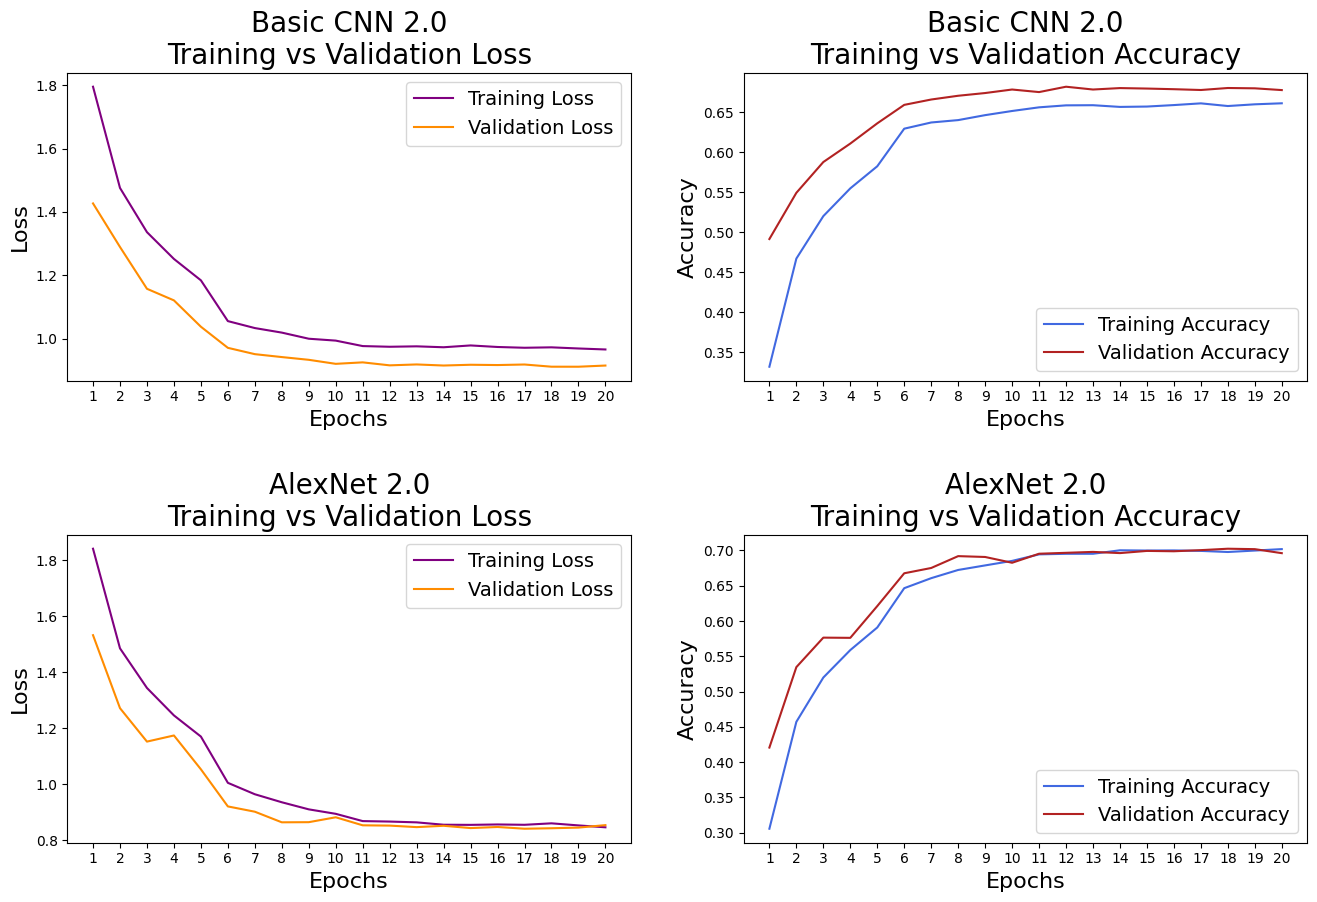

In [55]:
# Importing packages needed
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots for each model in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()
epochs = 20

# Plotting loss against epochs on the first subplot
axes[0].plot(cnn_model_2_training_loss, color="purple", label='Training Loss')
axes[0].plot(cnn_model_2_validation_loss, color="darkorange", label='Validation Loss')
axes[0].set_title('Basic CNN 2.0\nTraining vs Validation Loss', fontsize=20)
axes[0].set_xlabel('Epochs', fontsize=16)
axes[0].set_ylabel('Loss', fontsize=16)
axes[0].legend(fontsize=14)
axes[0].set_xticks(np.arange(epochs))
axes[0].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the second subplot
axes[1].plot(cnn_model_2_training_accuracy, color="royalblue", label='Training Accuracy')
axes[1].plot(cnn_model_2_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[1].set_title('Basic CNN 2.0\nTraining vs Validation Accuracy', fontsize=20)
axes[1].set_xlabel('Epochs', fontsize=16)
axes[1].set_ylabel('Accuracy', fontsize=16)
axes[1].legend(fontsize=14)
axes[1].set_xticks(np.arange(epochs))
axes[1].set_xticklabels(np.arange(1, epochs+1))

# Plotting loss against epochs on the third subplot
axes[2].plot(alexnet_model_2_training_loss, color="purple", label='Training Loss')
axes[2].plot(alexnet_model_2_validation_loss, color="darkorange", label='Validation Loss')
axes[2].set_title('AlexNet 2.0\nTraining vs Validation Loss', fontsize=20)
axes[2].set_xlabel('Epochs', fontsize=16)
axes[2].set_ylabel('Loss', fontsize=16)
axes[2].legend(fontsize=14)
axes[2].set_xticks(np.arange(epochs))
axes[2].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the fourth subplot
axes[3].plot(alexnet_model_2_training_accuracy, color="royalblue", label='Training Accuracy')
axes[3].plot(alexnet_model_2_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[3].set_title('AlexNet 2.0\nTraining vs Validation Accuracy', fontsize=20)
axes[3].set_xlabel('Epochs', fontsize=16)
axes[3].set_ylabel('Accuracy', fontsize=16)
axes[3].legend(fontsize=14)
axes[3].set_xticks(np.arange(epochs))
axes[3].set_xticklabels(np.arange(1, epochs+1))

# Plotting the plots
plt.show()

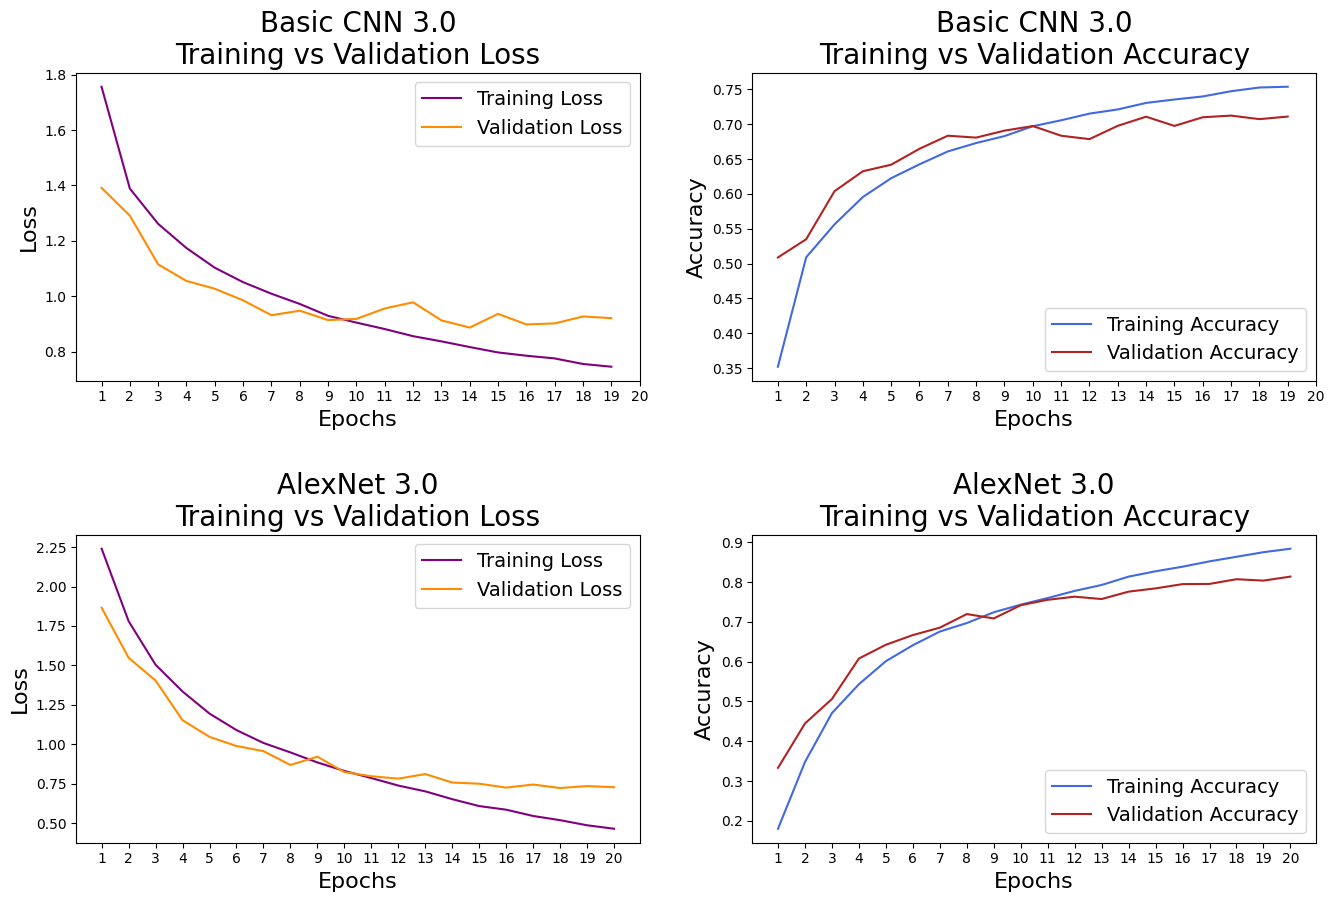

In [57]:
# Importing packages needed
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots for each model in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Plotting loss against epochs on the first subplot
axes[0].plot(cnn_model_3_training_loss, color="purple", label='Training Loss')
axes[0].plot(cnn_model_3_validation_loss, color="darkorange", label='Validation Loss')
axes[0].set_title('Basic CNN 3.0\nTraining vs Validation Loss', fontsize=20)
axes[0].set_xlabel('Epochs', fontsize=16)
axes[0].set_ylabel('Loss', fontsize=16)
axes[0].legend(fontsize=14)
axes[0].set_xticks(np.arange(epochs))
axes[0].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the second subplot
axes[1].plot(cnn_model_3_training_accuracy, color="royalblue", label='Training Accuracy')
axes[1].plot(cnn_model_3_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[1].set_title('Basic CNN 3.0\nTraining vs Validation Accuracy', fontsize=20)
axes[1].set_xlabel('Epochs', fontsize=16)
axes[1].set_ylabel('Accuracy', fontsize=16)
axes[1].legend(fontsize=14)
axes[1].set_xticks(np.arange(epochs))
axes[1].set_xticklabels(np.arange(1, epochs+1))

# Plotting loss against epochs on the third subplot
axes[2].plot(alexnet_model_3_training_loss, color="purple", label='Training Loss')
axes[2].plot(alexnet_model_3_validation_loss, color="darkorange", label='Validation Loss')
axes[2].set_title('AlexNet 3.0\nTraining vs Validation Loss', fontsize=20)
axes[2].set_xlabel('Epochs', fontsize=16)
axes[2].set_ylabel('Loss', fontsize=16)
axes[2].legend(fontsize=14)
axes[2].set_xticks(np.arange(epochs))
axes[2].set_xticklabels(np.arange(1, epochs+1))

# Plotting accuracy against epochs on the fourth subplot
axes[3].plot(alexnet_model_3_training_accuracy, color="royalblue", label='Training Accuracy')
axes[3].plot(alexnet_model_3_validation_accuracy, color="firebrick", label='Validation Accuracy')
axes[3].set_title('AlexNet 3.0\nTraining vs Validation Accuracy', fontsize=20)
axes[3].set_xlabel('Epochs', fontsize=16)
axes[3].set_ylabel('Accuracy', fontsize=16)
axes[3].legend(fontsize=14)
axes[3].set_xticks(np.arange(epochs))
axes[3].set_xticklabels(np.arange(1, epochs+1))

# Plotting the plots
plt.show()

## Comparing 3 Basic Models to 3 AlexNet Models

In [40]:
# Changing accuracies to percentage values
cnn_model_1_test_acc_percent = round(cnn_test_acc*100, 3)
cnn_model_2_test_acc_percent = round(cnn_model_2_test_acc*100, 3)
cnn_model_3_test_acc_percent = round(cnn_model_3_test_acc*100, 3)
alexnet_model_1_test_acc_percent = round(alexnet_test_acc*100, 3)
alexnet_model_2_test_acc_percent = round(alexnet_model_2_test_acc*100, 3)
alexnet_model_3_test_acc_percent = round(alexnet_model_3_test_acc*100, 3)

cnn_model_1_validation_accuracy_percent = round(cnn_validation_accuracy[-1]*100, 3)
cnn_model_2_validation_accuracy_percent = round(cnn_model_2_validation_accuracy[-1]*100, 3)
cnn_model_3_validation_accuracy_percent = round(cnn_model_3_validation_accuracy[-1]*100, 3)
alexnet_model_1_validation_accuracy_percent = round(alexnet_validation_accuracy[-1]*100, 3)
alexnet_model_2_validation_accuracy_percent = round(alexnet_model_2_validation_accuracy[-1]*100, 3)
alexnet_model_3_validation_accuracy_percent = round(alexnet_model_3_validation_accuracy[-1]*100, 3)

In [41]:
# Importing packages needed
import pandas as pd

# Creating a Pandas DataFrame with the test accuracy values and column labels
final_data = {'CNN Model': ['Basic', 'Basic 2.0', 'Basic 3.0', 'AlexNet', 'AlexNet 2.0', 'AlexNet 3.0'],
        'Validation Accuracy (%)': [cnn_model_1_validation_accuracy_percent, cnn_model_2_validation_accuracy_percent, cnn_model_3_validation_accuracy_percent, alexnet_model_1_validation_accuracy_percent, alexnet_model_2_validation_accuracy_percent, alexnet_model_3_validation_accuracy_percent],
        'Test Accuracy (%)': [cnn_model_1_test_acc_percent, cnn_model_2_test_acc_percent, cnn_model_3_test_acc_percent, alexnet_model_1_test_acc_percent, alexnet_model_2_test_acc_percent, alexnet_model_3_test_acc_percent]}

final_models_accuracy_table = pd.DataFrame(final_data)
final_models_accuracy_table = final_models_accuracy_table.sort_values(by='Test Accuracy (%)', ascending=False)

# Showing the table
final_models_accuracy_table

,CNN Model,Validation Accuracy (%),Test Accuracy (%)
5,AlexNet 3.0,81.40,80.10
3,AlexNet,71.97,71.22
2,Basic 3.0,71.10,71.02
4,AlexNet 2.0,69.62,69.87
0,Basic,68.44,68.13
1,Basic 2.0,67.78,66.56


## Testing predictions

In [43]:
# Importing packages needed
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Making predictions on the test dataset
predictions = alexnet_model_3.predict(test_images)

# Getting the class labels with the highest predicted probability for each sample
predicted_labels = np.argmax(predictions, axis=1)

# Getting the true class labels for the test dataset
true_labels = np.argmax(test_labels, axis=1)

# Getting the label names
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Calculating accuracy for each class
class_accuracies = []
for class_id in range(10):
    class_indices = np.where(true_labels == class_id)[0]
    class_accuracy = accuracy_score(true_labels[class_indices], predicted_labels[class_indices])
    class_accuracy_percentage = round(class_accuracy*100, 3)
    class_accuracies.append(class_accuracy_percentage)

# Creating a Pandas DataFrame to display the class accuracies
class_accuracy_df = pd.DataFrame({'Class': labels, 'Accuracy (%)': class_accuracies})

# Printting the table of class accuracies
print(class_accuracy_df)

# Overall test accuracy
overall_test_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Test Accuracy: {round(overall_test_accuracy*100, 3)}%')


313/313 [==============================] - 1s 2ms/step
        Class  Accuracy (%)
0    Airplane          80.6
1  Automobile          91.3
2        Bird          64.8
3         Cat          71.8
4        Deer          82.1
5         Dog          60.0
6        Frog          87.6
7       Horse          83.3
8        Ship          92.9
9       Truck          86.6
Overall Test Accuracy: 80.1%


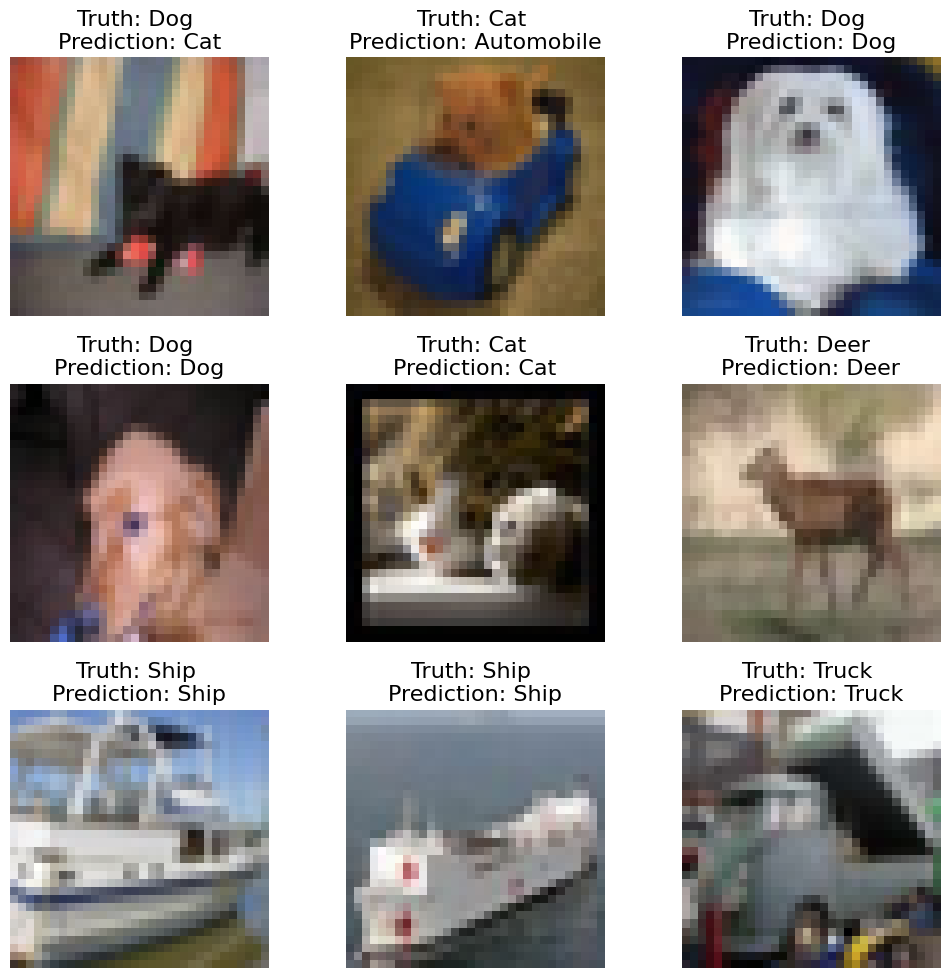

In [67]:
# Importing packages needed
import matplotlib.pyplot as plt
import numpy as np
import torch

# Setting a manual seed
torch.manual_seed(1748578)

# Choosing a random subset of test images
random_indices = np.random.choice(len(test_images), 9, replace=False)

# Creating a subplot for displaying the random images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

# Plotting each image with their respective truth and prediction class labels
for i, random_index in enumerate(random_indices):
    axes[i].imshow(test_images[random_index])
    true_label = labels[labels_true[random_index]]
    predicted_label = labels[labels_pred[random_index]]
    axes[i].set_title('Truth: %s \nPrediction: %s' % (true_label, predicted_label), fontsize=16)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.3)

# Plotting the plots
plt.show()


### Random sample of 6 pics for figure 1

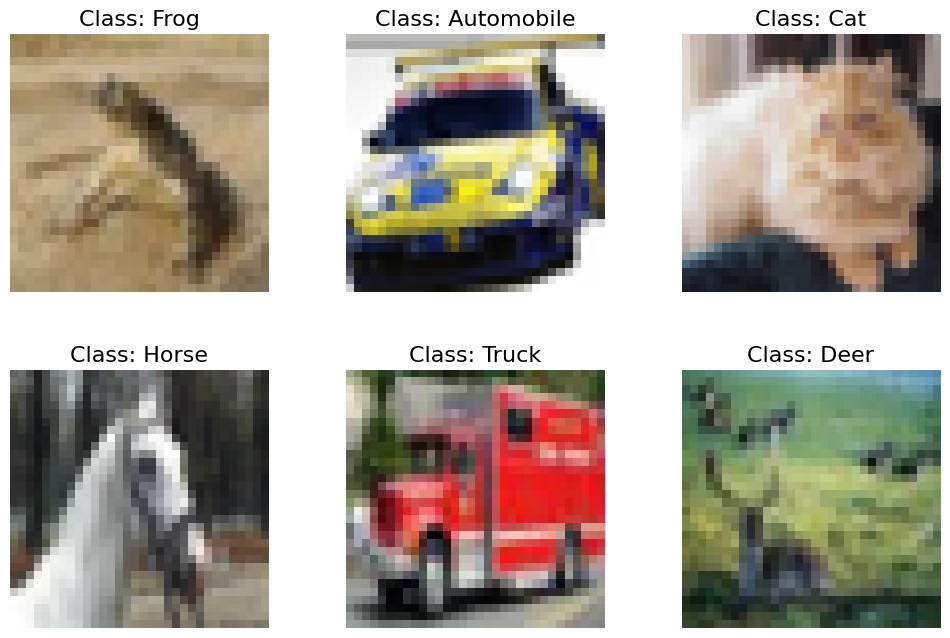

In [48]:
# Importing packages needed
import matplotlib.pyplot as plt
import numpy as np

# Choosing a random subset of images
random_indices = np.random.choice(len(test_images), 6, replace=False)

# Creating a subplot for displaying the random images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

# Plotting each image with their respective class labels
for i, random_index in enumerate(random_indices):
    axes[i].imshow(test_images[random_index])
    true_label = labels[labels_true[random_index]]
    axes[i].set_title('Class: %s' % true_label, fontsize=16)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.3)

# Plotting the plots
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()